## Lab 7
#### Prepare and Explore Data
We will use the seeds dataset comprising kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian. Theseeds dataset contains 7 geometric measurements of wheat kernels:
1. CustomerID
2. Gender
3. Age
4. AnnualIncome
5. SpendingScore
6. asymmetry coefficient
7. length of kernel groove

All of the attributes are continuous. Since we do not know which wheat variety each seed belongs to, we will apply clustering tohelp us uncover 3 clusters based on the kernel measurements.Let us load the seeds dataset.


In [41]:
# Import pandas library
import pandas as pd

In [42]:
# Read csv data file
x = pd.read_csv('Data/seeds.csv')
x.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [43]:
# View the number of instances and attributes
x.shape

(210, 7)

In [44]:
# View a summary of the data
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   area                   210 non-null    float64
 1   perimeter              210 non-null    float64
 2   compactness            210 non-null    float64
 3   kernel_length          210 non-null    float64
 4   kernel_width           210 non-null    float64
 5   asymmetry_coefficient  210 non-null    float64
 6   kernel_groove_length   210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [45]:
# Create a subset of the data frame containing 2 attributes
x2 = x[['area', 'perimeter']]
x2.head()

,area,perimeter
0,15.26,14.84
1,14.88,14.57
2,14.29,14.09
3,13.84,13.94
4,16.14,14.99


#### K-Means Clustering
K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2)chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.We will first run k-means clustering on x2.

In [46]:
# Import KMeans from scikit-learn
from sklearn.cluster import KMeans
# Create KMeans object
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init = 'auto')
# Fit KMeans object to data
kmeans.fit(x2)
# Print location of clusters learned by kmeans object
print("Coordinates of cluster centers: ", kmeans.cluster_centers_)
print("Label of each point: ", kmeans.labels_)
print("Number of iterations run: ", kmeans.n_iter_)

Coordinates of cluster centers:  [[18.92945455 16.38127273]
 [12.03758621 13.30436782]
 [15.14102941 14.69117647]]
Label of each point:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 1 2 1 1 2 2 2 2 2 2
 2 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 2 2 2 1 0 2 0 0
 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 2 2 2 0 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of iterations run:  3


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


From the label of each point, note that the clusters are labeled cluster 0, cluster 1 and cluster 2. In the example above, we onlyspecify the n_cluster parameter to set the number of clusters and random_state parameter to ensure we get reproducible results.

For more information about KMeans parameters we can set, check out: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html.Since there are only 2 dimensions (i.e., 2 attributes), we can map the data points in a 2-dimensional scatter plot. The first 2parameters in scatter() indicates the data position. The first parameter indicates all the area values in cluster 0. The secondparameter indicates all the perimeter values in cluster 0

In [47]:
# Save new clusters for plot
y_kmeans = kmeans.fit_predict(x2)
y_kmeans

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

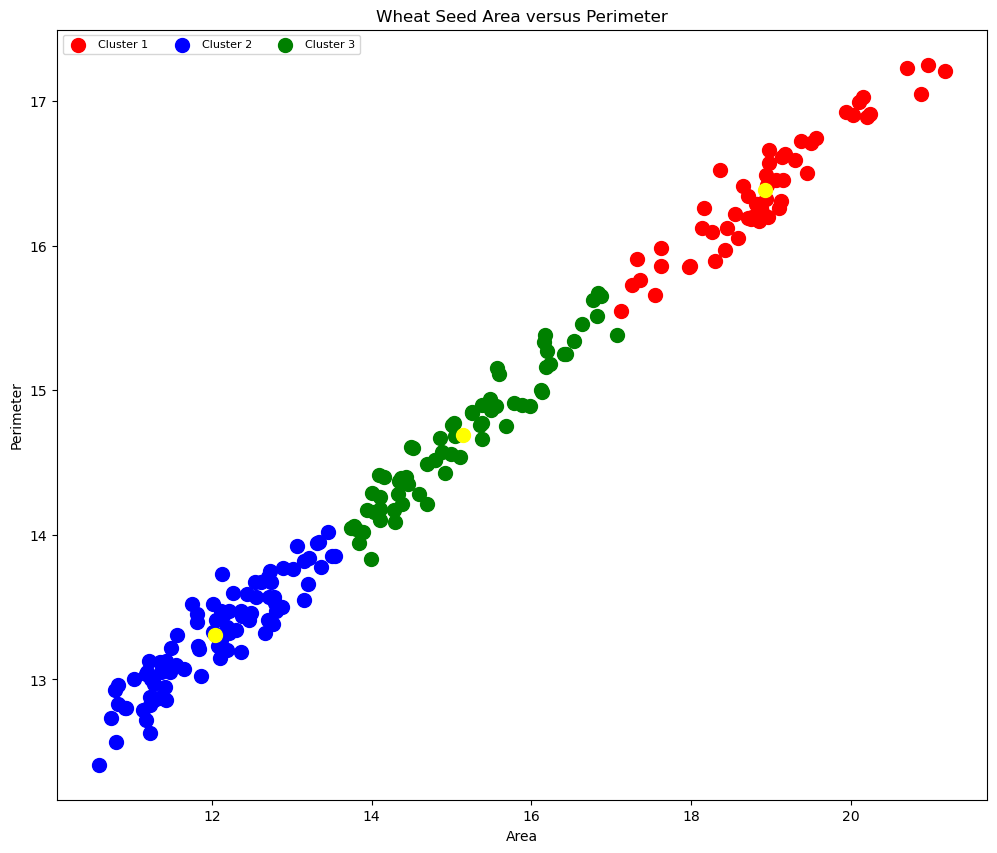

In [48]:
# Import pyplot for plotting
import matplotlib.pyplot as plt
# Set plot size
plt.figure(figsize = (12,10))
# Plot the 3 clusters# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_kmeans == 0, 0], x2.iloc[y_kmeans == 0, 1], s = 100,                      
                       c = 'red', label = 'Cluster 1')
# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_kmeans == 1, 0], x2.iloc[y_kmeans == 1, 1], s = 100,                        
                       c= 'blue', label = 'Cluster 2')
# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_kmeans == 2, 0], x2.iloc[y_kmeans == 2, 1], s = 100,                       
                       c = 'green', label = 'Cluster 3')
# Plot the centroids# We are going to use the attribute that returns the coordinates of the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100,           
            c = 'yellow', label = 'Centroids')
# Show legend
plt.legend((cluster0, cluster1, cluster2),           ('Cluster 1', 'Cluster 2', 'Cluster 3'),           scatterpoints = 1,           loc = 'upper left',           ncol = 3,           fontsize = 8)
# Show plot title
plt.title('Wheat Seed Area versus Perimeter')
# Label x-axis
plt.xlabel('Area')
# Label y-axisIn [9]:Out[9]:In [10]:
plt.ylabel('Perimeter')
# Show plot
plt.show()

In the resulting scatter plot, we can see that k-means placed the three centroids at the center of each cluster, which looks like agood grouping given this dataset. We can observe cluster 1 contains kernels with small area and short perimeter, cluster 2contains kernels with moderate area and medium perimeter and cluster 3 contains kernels with large area and long perimeter. K-means clustering seems to work well in grouping the data into the 3 wheat varieties.
Now let us try to run k-means on the dataset with 7 attributes

In [49]:
x.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,kernel_groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [50]:
# Fit KMeans object to data
kmeans.fit(x)
# Print location of clusters learned by kmeans object
print("Coordinates of cluster centers: ", kmeans.cluster_centers_)
print("Label of each point: ", kmeans.labels_)
print("Number of iterations run: ", kmeans.n_iter_)

Coordinates of cluster centers:  [[18.72180328 16.29737705  0.88508689  6.20893443  3.72267213  3.60359016
   6.06609836]
 [11.96441558 13.27480519  0.8522      5.22928571  2.87292208  4.75974026
   5.08851948]
 [14.64847222 14.46041667  0.87916667  5.56377778  3.27790278  2.64893333
   5.19231944]]
Label of each point:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 0 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 2 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 2 2 2 0 2 2 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1]
Number of iterations run:  3


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


With 7 attributes, there are 7 dimensions so it would be difficult to visualize the 3 clusters. To make sense of the clusters, we canstudy the values of the centroids. For example, of the 3 clusters, we can observe that the kernels in the first cluster have thesmallest area and the shortest perimeter but the largest asymmetry coefficient.

#### Agglomerative Clustering
For hierarchical clustering, we begin with every point in our dataset as a 'cluster'. Then, we find the two closest points andcombine them into a cluster. Then, we find the next closest points, and those become a cluster. We repeat the process until weonly have one big giant cluster.Hierarchical clustering is implemented using scikit-learn's AgglomerativeClustering
Let us first try to run AgglomerativeClustering on the dataset with 2 attributes (x2)

In [51]:
# Import hierarchical clustering library
from sklearn.cluster import AgglomerativeClustering
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'single')
ag.fit(x2)
# Print the cluster label of each data point
print("Label of each point: ", ag.labels_)

Label of each point:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 2 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 1 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


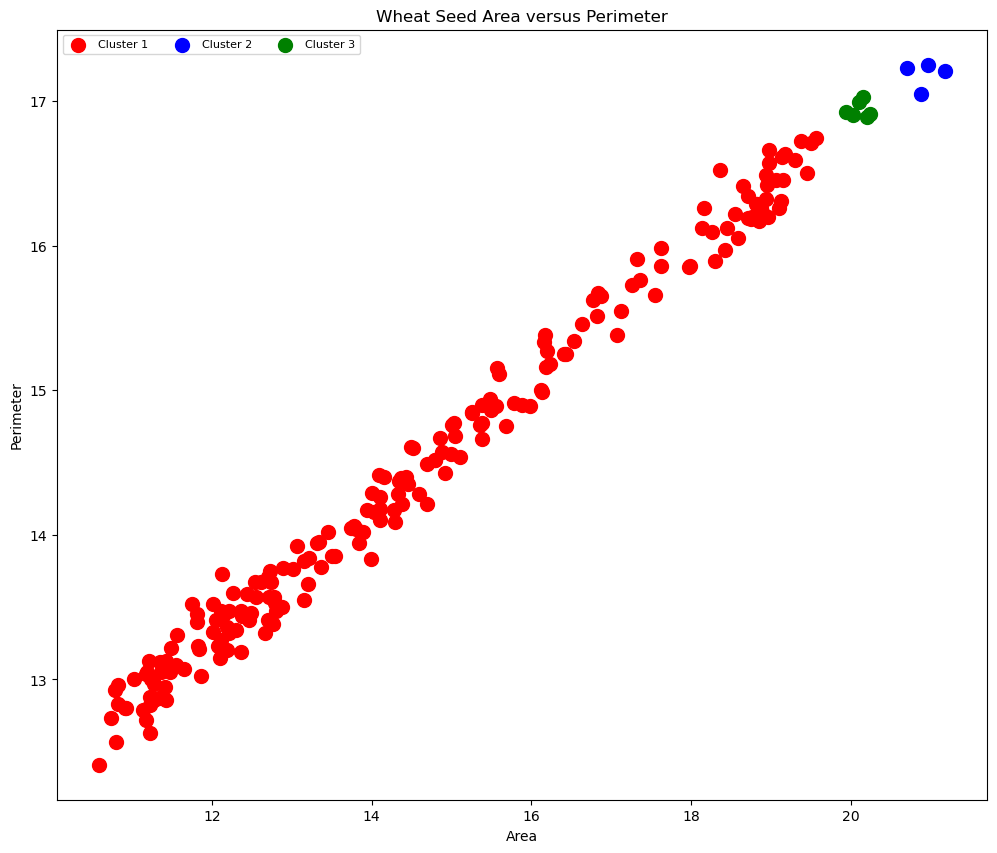

In [52]:
# Save new clusters for plot
y_hc = ag.fit_predict(x2)
y_hc
# Set plot size
plt.figure(figsize = (12,10))
# Plot the 3 clusters# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_hc == 0, 0], x2.iloc[y_hc == 0, 1], s = 100,                       
                       c = 'red', label = 'Cluster 1')
# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_hc == 1, 0], x2.iloc[y_hc == 1, 1], s = 100, 
                                              c= 'blue', label = 'Cluster 2')
# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_hc == 2, 0], x2.iloc[y_hc == 2, 1], s = 100, 
                                              c = 'green', label = 'Cluster 3')
# Show legend
plt.legend((cluster0, cluster1, cluster2),           
           ('Cluster 1', 'Cluster 2', 'Cluster 3'),           
           scatterpoints = 1,           
           loc = 'upper left',           
           ncol = 3,           
           fontsize = 8)
# Show plot title
plt.title('Wheat Seed Area versus Perimeter')
# Label x-axis
plt.xlabel('Area')
# Label y-axis
plt.ylabel('Perimeter')
# Show plot
plt.show()

The scatter plot can only be used to visualize the clusters when there are 2 attributes in the dataset. From the scatter plot above,we observe that using the linkage "single" produces bad clusters as most of the data points are grouped into one cluster.The dendrogram is more commonly used to visualize the output from hierarchical clustering. Let us try to visualize the clustersusing a dendrogram.


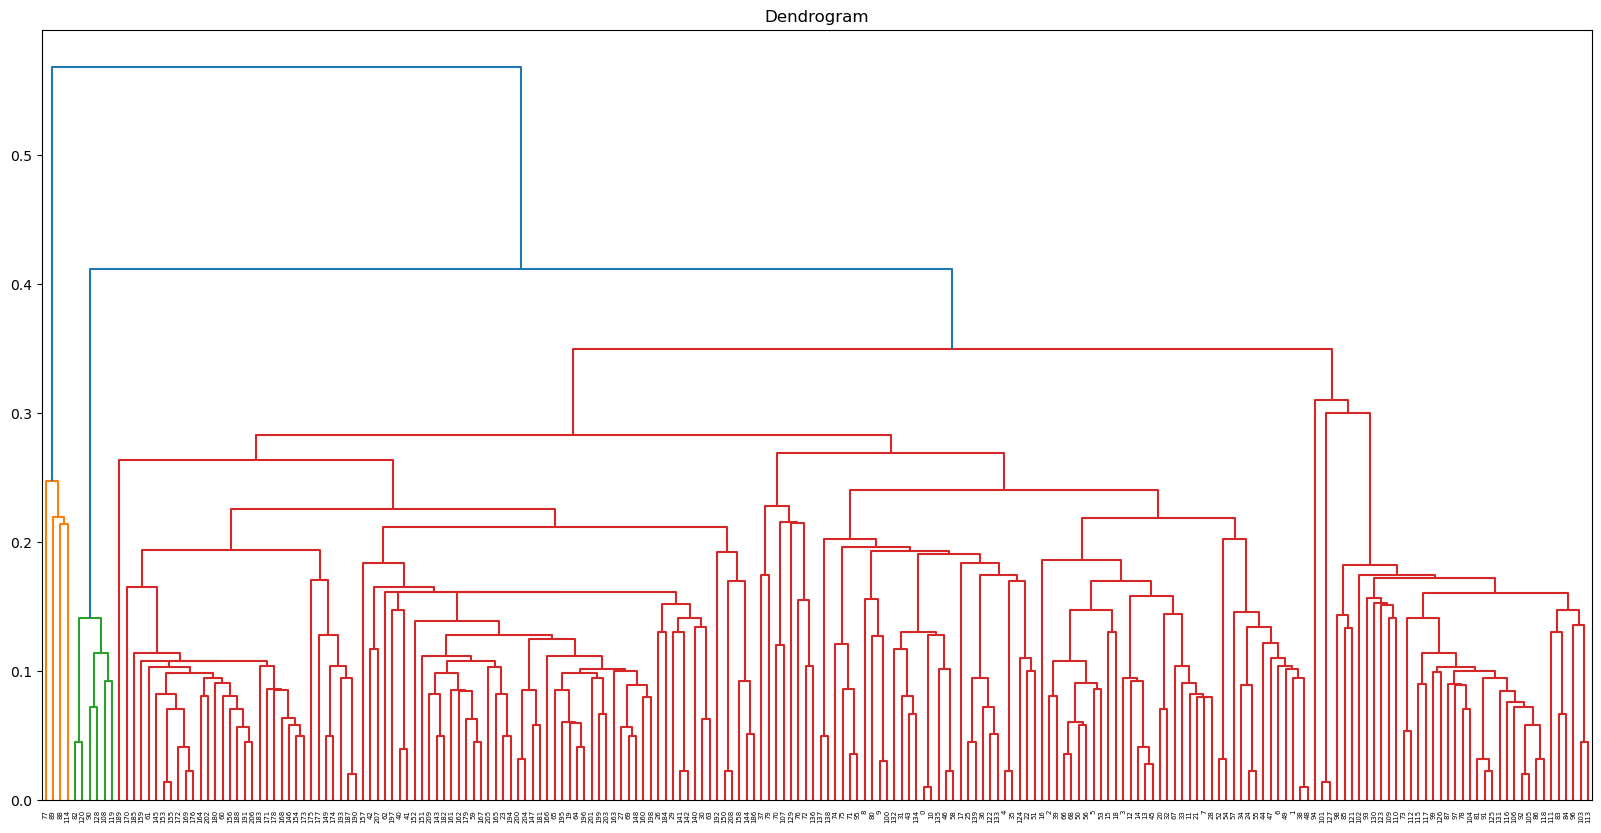

In [53]:
# Import library to generate dendogram
import scipy.cluster.hierarchy as sch
# Set plot size
plt.figure(figsize = (20, 10))
# Set the plot title
plt.title("Dendrogram")
# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, method = 'single'))
# Show plot
plt.show()

The dendrogram is not balanced and is an extreme slant towards one end is observed. Such a dendrogram further illustrates thatthe clusters produced are bad.
Now we will run hierarchical clustering on the full dataset.

In [54]:
# Fit AgglomerativeClustering object to data
ag.fit_predict(x)
# Print the cluster label of each data point
print("Label of each point: ", ag.labels_)

Label of each point:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0]


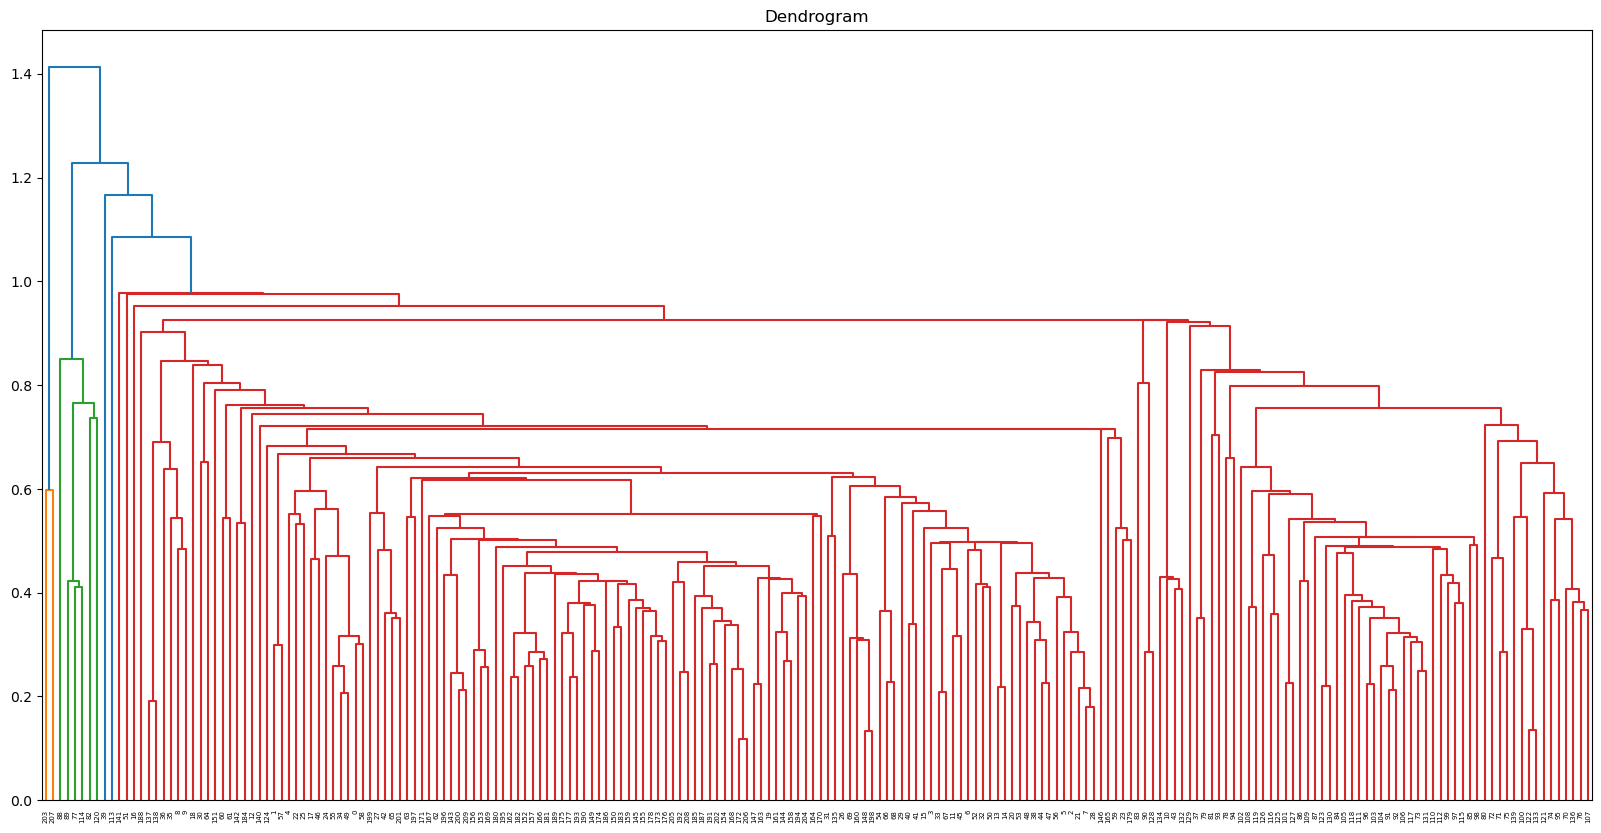

In [55]:
# Set plot size
plt.figure(figsize = (20, 10))
# Set the plot title
plt.title("Dendrogram")
# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x, method = 'single'))
# How plot
plt.show()

When hierarchical clustering using single linkage is applied on the full dataset (x), the dendrogram also shows that most of thedata points still fall into one cluster. Thus, the clusters returned are bad.We can try to change the linkage parameter to see if we are able to produce better clusters. Let us change the linkage parameterto "complete".

In [56]:
# Create AgglomerativeClustering object
ag2 = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
ag2.fit_predict(x)
# Print the cluster label of each data point
print("Label of each point: ", ag2.labels_)

Label of each point:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 0 2 2 0 0 2 2 0 2 2 2 2 2 2
 2 2 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 0 2 2 2 1
 2 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


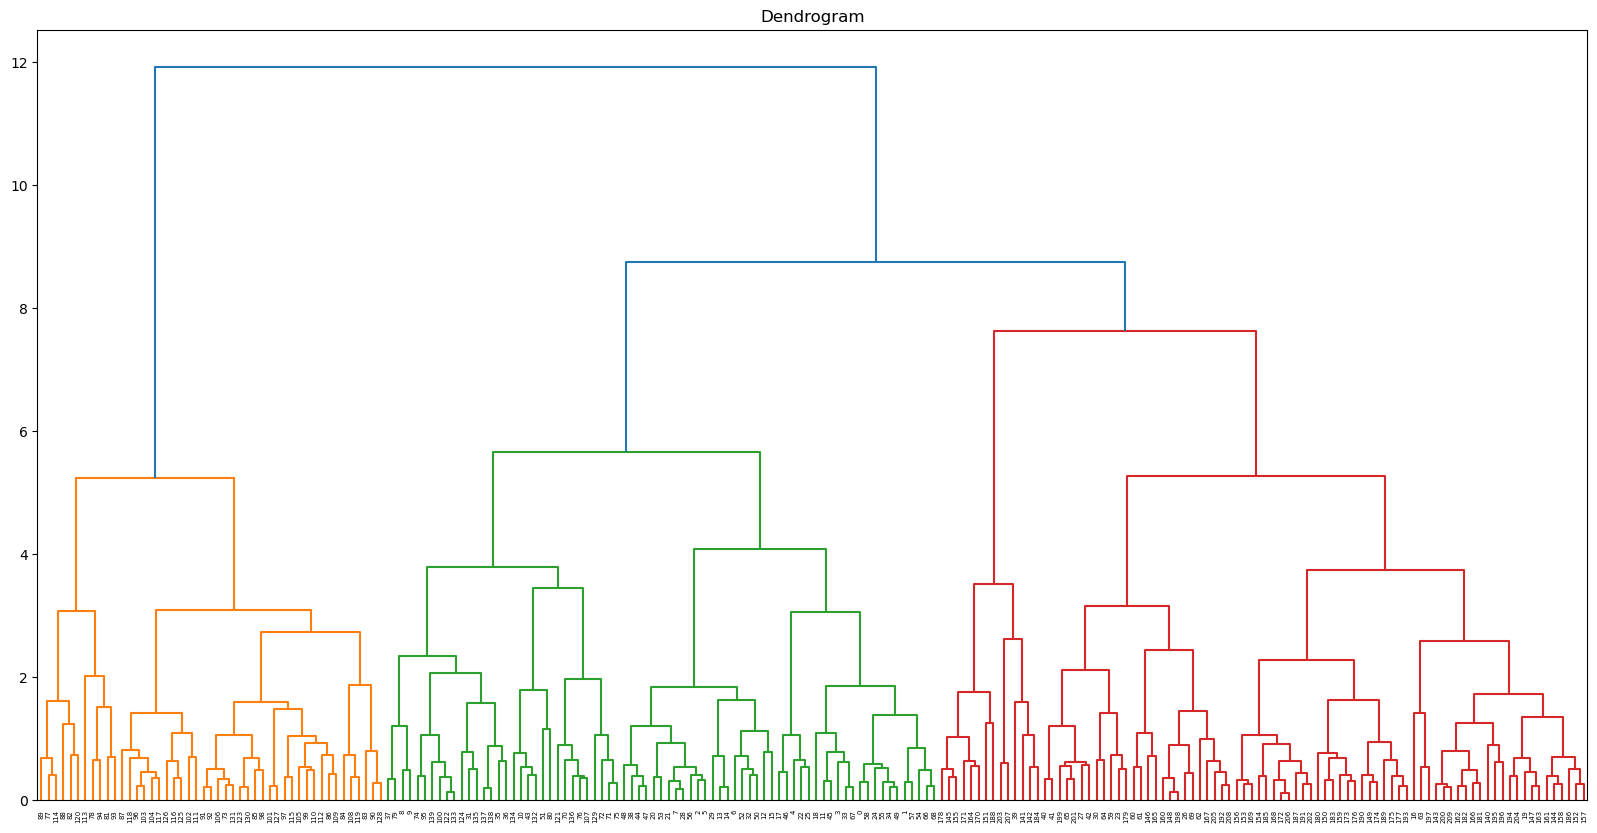

In [57]:
# Set plot size
plt.figure(figsize = (20, 10))
# Set the plot title
plt.title("Dendrogram")
# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x, method = 'complete'))
# How plot
plt.show()